MODELAGEM PREDITIVA DO VALOR DE ALUGUEIS DE APARTAMENTOS EM ALGUMAS CIDADES DO BRASIL










In [ ]:
!pip -q install yellowbrick

In [ ]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.2 MB 5.2 MB/s 


In [ ]:
import pandas as pd #carregamento de arquivos e manipulação csv
import numpy as np #metodos numéricos
import seaborn as sns #visualização de gráficos
import matplotlib.pyplot as plt #visualização de gráficos
import plotly.express as px #gráficos dinâmicos

In [ ]:
!python --version

Python 3.7.13


#**Base de dados das propriedades de São Paulo**

Retirado de: <https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019>

##Processamento e tratamento dos dados

In [ ]:
base_sp = pd.read_csv('/content/sao-paulo-properties-april-2019.csv')

In [ ]:
base_sp

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [ ]:
base_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [ ]:
#Verificar se todos os tipos de dados são apartamentos
np.unique(base_sp['Property Type'], return_counts=True)

(array(['apartment'], dtype=object), array([13640]))

In [ ]:
#Excluindo algumas colunas que não serão necessárias
base_sp.drop(["Latitude", "Longitude","Property Type","District","New","Swimming Pool","Elevator","Suites"], axis=1, inplace=True)

In [ ]:
#Só trabalharemos com propriedades para locação.
base_sp[base_sp['Negotiation Type'] == 'sale'] 

,Price,Condo,Size,Rooms,Toilets,Parking,Furnished,Negotiation Type
4901,732600,1000,74,1,2,2,0,sale
4902,1990000,2400,164,4,5,3,1,sale
4903,720000,700,70,2,2,1,0,sale
4904,1680000,1580,155,3,5,2,0,sale
4905,1200000,900,56,2,2,2,1,sale
...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,1,0,sale
13636,545000,630,74,3,2,2,0,sale
13637,515000,1100,114,3,3,1,0,sale
13638,345000,48,39,1,2,1,1,sale


In [ ]:
#excluir linhas que possuem tipo de negociação venda
base_sp = base_sp.drop(base_sp[base_sp['Negotiation Type'] == 'sale'].index)

In [ ]:
base_sp

,Price,Condo,Size,Rooms,Toilets,Parking,Furnished,Negotiation Type
0,930,220,47,2,2,1,0,rent
1,1000,148,45,2,2,1,0,rent
2,1000,100,48,2,2,1,0,rent
3,1000,200,48,2,2,1,0,rent
4,1300,410,55,2,2,1,0,rent
...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,0,rent
11206,21000,3000,208,4,4,3,1,rent
11207,3800,710,55,1,1,1,1,rent
11208,5000,2354,205,3,2,2,0,rent


In [ ]:
np.unique(base_sp['Negotiation Type'], return_counts=True)

(array(['rent'], dtype=object), array([7228]))

In [ ]:
#Excluir a coluna que representa o tipo de negociação
base_sp.drop(["Negotiation Type"], axis=1, inplace=True)

In [ ]:
#Somando o valor do condominio e o preço do aluguel, para termos o preço total
base_sp['Price'] = base_sp['Condo']+base_sp['Price']

In [ ]:
#renomeando as colunas
base_sp = base_sp.rename(columns={"Price":"Preço"})
base_sp = base_sp.rename(columns={"Condo":"Condominio"})
base_sp = base_sp.rename(columns={"Size":"Tamanho"})
base_sp = base_sp.rename(columns={"Rooms":"Quartos"})
base_sp = base_sp.rename(columns={"Toilets":"Banheiros"})
base_sp = base_sp.rename(columns={"Parking":"Estacionamento"})
base_sp = base_sp.rename(columns={"Furnished":"Mobiliado"})

In [ ]:
base_sp

,Preço,Condominio,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado
0,1150,220,47,2,2,1,0
1,1148,148,45,2,2,1,0
2,1100,100,48,2,2,1,0
3,1200,200,48,2,2,1,0
4,1710,410,55,2,2,1,0
...,...,...,...,...,...,...,...
11205,4295,595,73,1,2,1,0
11206,24000,3000,208,4,4,3,1
11207,4510,710,55,1,1,1,1
11208,7354,2354,205,3,2,2,0


In [ ]:
#Colocando as colunas em ordem
base_sp = base_sp[['Tamanho', 'Quartos', 'Banheiros','Estacionamento','Mobiliado','Condominio','Preço']]

In [ ]:
#Formatando a coluna preço e condomínio para float
base_sp[['Preço']] = base_sp[['Preço']].astype(float)
base_sp[['Condominio']] = base_sp[['Condominio']].astype(float)

In [ ]:
base_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 0 to 11209
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tamanho         7228 non-null   int64  
 1   Quartos         7228 non-null   int64  
 2   Banheiros       7228 non-null   int64  
 3   Estacionamento  7228 non-null   int64  
 4   Mobiliado       7228 non-null   int64  
 5   Condominio      7228 non-null   float64
 6   Preço           7228 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 451.8 KB


In [ ]:
#Verificar se existem outliers, algum dado inconsistente. 
grafico = px.scatter_matrix(base_sp, dimensions=['Tamanho', 'Condominio', 'Preço'])
grafico.show()


In [ ]:
base_sp.loc[base_sp['Tamanho'] > 800]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
3865,880,5,4,6,0,7800.0,27700.0
10698,852,7,6,6,0,5040.0,13740.0


In [ ]:
#Vamos excluir alguns dados que possuem o maior tamanho, mas estão com preço do aluguel baixo
base_sp = base_sp.drop(base_sp[base_sp['Tamanho'] > 800].index)

In [ ]:
grafico = px.scatter_matrix(base_sp, dimensions=['Quartos', 'Banheiros', 'Estacionamento', 'Mobiliado', 'Preço'])
grafico.show()

In [ ]:
base_sp.loc[base_sp['Quartos'] == 10]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
1340,273,10,4,8,0,0.0,8000.0


In [ ]:
base_sp.loc[base_sp['Quartos'] == 6]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
3864,510,6,5,3,0,4200.0,12200.0
9941,400,6,8,2,1,5800.0,19800.0


In [ ]:
#Vamos excluir alguns dados que possuem um número grande de quartos, mas estão com preço baixo de aluguel
base_sp = base_sp.drop(base_sp[base_sp['Quartos'] == 10].index)
base_sp = base_sp.drop(base_sp[base_sp['Quartos'] == 6].index)

In [ ]:
base_sp.loc[base_sp['Banheiros'] == 8]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
9512,313,5,8,4,0,0.0,6000.0


In [ ]:
#Vamos excluir um dado que possui um número grande de banheiro, mas esta com um preço baixo de aluguel
base_sp = base_sp.drop(base_sp[base_sp['Banheiros'] == 8].index)

In [ ]:
base_sp.loc[base_sp['Estacionamento'] == 8]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
10685,600,4,5,8,0,6000.0,31000.0


In [ ]:
base_sp.loc[base_sp['Estacionamento'] == 9]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
1517,222,4,5,9,0,3320.0,28320.0


In [ ]:
#Vamos excluir alguns dados que possuem um número alto de estacionamentos, mas estão com preço baixo de aluguel
base_sp = base_sp.drop(base_sp[base_sp['Estacionamento'] == 8].index)
base_sp = base_sp.drop(base_sp[base_sp['Estacionamento'] == 9].index)

In [ ]:
base_sp

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
0,47,2,2,1,0,220.0,1150.0
1,45,2,2,1,0,148.0,1148.0
2,48,2,2,1,0,100.0,1100.0
3,48,2,2,1,0,200.0,1200.0
4,55,2,2,1,0,410.0,1710.0
...,...,...,...,...,...,...,...
11205,73,1,2,1,0,595.0,4295.0
11206,208,4,4,3,1,3000.0,24000.0
11207,55,1,1,1,1,710.0,4510.0
11208,205,3,2,2,0,2354.0,7354.0


#**Base de dados das propriedades de algumas cidades do Brasil**

Retirado de <https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent>

##Processamento e tratamento dos dados

In [ ]:
base_fora = pd.read_csv('/content/houses_to_rent_v2.csv')

In [ ]:
base_fora

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [ ]:
base_fora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
#Verificar quais cidades estão incluidas na base de dados
np.unique(base_fora['city'], return_counts=True)

(array(['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro',
        'São Paulo'], dtype=object), array([1258,  853, 1193, 1501, 5887]))

In [ ]:
#Excluir algumas colunas que não serão necessárias
base_fora.drop(["city", "floor","animal","rent amount (R$)","property tax (R$)","fire insurance (R$)"], axis=1, inplace=True)

In [ ]:
base_fora

,area,rooms,bathroom,parking spaces,furniture,hoa (R$),total (R$)
0,70,2,1,1,furnished,2065,5618
1,320,4,4,0,not furnished,1200,7973
2,80,1,1,1,not furnished,1000,3841
3,51,2,1,0,not furnished,270,1421
4,25,1,1,0,not furnished,0,836
...,...,...,...,...,...,...,...
10687,63,2,1,1,furnished,402,1926
10688,285,4,4,4,not furnished,3100,19260
10689,70,3,3,0,furnished,980,7390
10690,120,2,2,2,furnished,1585,14020


In [ ]:
#Renomeando as colunas
base_fora = base_fora.rename(columns={"total (R$)":"Preço"})
base_fora = base_fora.rename(columns={"hoa (R$)":"Condominio"})
base_fora = base_fora.rename(columns={"area":"Tamanho"})
base_fora = base_fora.rename(columns={"rooms":"Quartos"})
base_fora = base_fora.rename(columns={"bathroom":"Banheiros"})
base_fora = base_fora.rename(columns={"parking spaces":"Estacionamento"})
base_fora = base_fora.rename(columns={"furniture":"Mobiliado"})

In [ ]:
#Fromatando algumas colunas
base_fora[['Preço']] = base_fora[['Preço']].astype(float)
base_fora[['Condominio']] = base_fora[['Condominio']].astype(float)

In [ ]:
#Trocar não mobiliado por 0 e mobiliado por 1
base_fora['Mobiliado'] = base_fora['Mobiliado'].apply(lambda x: x.replace('not furnished', '0').replace('furnished', '1'))

In [ ]:
base_fora

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
0,70,2,1,1,1,2065.0,5618.0
1,320,4,4,0,0,1200.0,7973.0
2,80,1,1,1,0,1000.0,3841.0
3,51,2,1,0,0,270.0,1421.0
4,25,1,1,0,0,0.0,836.0
...,...,...,...,...,...,...,...
10687,63,2,1,1,1,402.0,1926.0
10688,285,4,4,4,0,3100.0,19260.0
10689,70,3,3,0,1,980.0,7390.0
10690,120,2,2,2,1,1585.0,14020.0


In [ ]:
#Formatar a coluna mobiliado pro tipo inteiro
base_fora[['Mobiliado']] = base_fora[['Mobiliado']].astype(int)

In [ ]:
base_fora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tamanho         10692 non-null  int64  
 1   Quartos         10692 non-null  int64  
 2   Banheiros       10692 non-null  int64  
 3   Estacionamento  10692 non-null  int64  
 4   Mobiliado       10692 non-null  int64  
 5   Condominio      10692 non-null  float64
 6   Preço           10692 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 584.8 KB


In [ ]:
#Visualizar algum dado inconsistente 
grafico = px.scatter_matrix(base_fora, dimensions=['Tamanho', 'Condominio', 'Preço'])
grafico.show()

In [ ]:
base_fora.loc[base_fora['Tamanho'] > 1000]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
654,1600,6,6,6,1,0.0,9549.0
2397,46335,4,8,5,1,960.0,10220.0
2423,1020,5,4,6,1,0.0,7281.0
3559,1100,4,6,10,0,3000.0,19210.0
4813,1600,4,5,12,0,1.0,12010.0
5129,2000,4,2,3,0,0.0,5238.0
5915,24606,5,4,4,0,2254.0,18320.0
8790,2000,3,3,2,1,3000.0,8267.0
9241,12732,3,2,0,0,700.0,2417.0


In [ ]:
#Excluir dados cujo tamanho em m^2 é maior que 1000
base_fora = base_fora.drop(base_fora[base_fora['Tamanho'] > 1000].index)

In [ ]:
base_fora.loc[base_fora['Condominio'] > 10000]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
255,155,1,4,0,0,1117000.0,1120000.0
415,488,4,3,3,0,14130.0,21820.0
1213,850,6,7,4,0,15000.0,30660.0
1444,42,1,1,0,0,32000.0,32750.0
2859,285,4,5,4,1,200000.0,222100.0
2928,35,1,1,0,1,81150.0,95610.0
5293,850,5,7,8,0,14000.0,18050.0
6230,340,5,4,2,0,220000.0,233200.0
6979,155,1,4,0,0,1117000.0,1120000.0


In [ ]:
#Excluir dados cujo condomínio é superior a 10000
base_fora = base_fora.drop(base_fora[base_fora['Condominio'] > 10000].index)

In [ ]:
base_fora.loc[base_fora['Preço'] > 50000]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
2182,700,4,7,8,0,0.0,54430.0
6645,42,1,2,1,0,690.0,316900.0


In [ ]:
#Excluir dados cujo valor do preço é superior a 50000
base_fora = base_fora.drop(base_fora[base_fora['Preço'] > 50000].index)

In [ ]:
grafico = px.scatter_matrix(base_fora, dimensions=['Tamanho', 'Condominio', 'Preço'])
grafico.show()

In [ ]:
grafico = px.scatter_matrix(base_fora, dimensions=['Quartos', 'Banheiros', 'Estacionamento', 'Mobiliado', 'Preço'])
grafico.show()

In [ ]:
base_fora.loc[base_fora['Quartos'] == 13]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
7835,439,13,4,3,0,0.0,15900.0


In [ ]:
base_fora.loc[base_fora['Quartos'] == 10]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
752,341,10,6,7,0,0.0,6050.0
1639,400,10,5,8,0,0.0,12480.0
5178,400,10,9,8,0,0.0,9006.0


In [ ]:
#Excluir dados que possuem o número de quartos maiores ou iguais a 10
base_fora = base_fora.drop(base_fora[base_fora['Quartos'] == 13].index)
base_fora = base_fora.drop(base_fora[base_fora['Quartos'] == 10].index)

In [ ]:
base_fora.loc[base_fora['Banheiros'] == 10]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
2055,998,7,10,4,1,0.0,20230.0
8187,700,4,10,0,0,0.0,23980.0
9021,458,8,10,4,0,0.0,7534.0


In [ ]:
#Excluir dados que possuem o número de banheiros iguais a 10.
base_fora = base_fora.drop(base_fora[base_fora['Banheiros'] == 10].index)

In [ ]:
base_fora.loc[base_fora['Estacionamento'] == 10]

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
5445,190,1,2,10,0,0.0,3993.0


In [ ]:
#Excluir dados que possuem o número de estacionamentos iguais a 10.
base_fora = base_fora.drop(base_fora[base_fora['Estacionamento'] == 10].index)

In [ ]:
base_fora

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
0,70,2,1,1,1,2065.0,5618.0
1,320,4,4,0,0,1200.0,7973.0
2,80,1,1,1,0,1000.0,3841.0
3,51,2,1,0,0,270.0,1421.0
4,25,1,1,0,0,0.0,836.0
...,...,...,...,...,...,...,...
10687,63,2,1,1,1,402.0,1926.0
10688,285,4,4,4,0,3100.0,19260.0
10689,70,3,3,0,1,980.0,7390.0
10690,120,2,2,2,1,1585.0,14020.0


#Juntando as duas base de dados

In [ ]:
base_total = pd.concat([base_sp, base_fora])

In [ ]:
base_total

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
0,47,2,2,1,0,220.0,1150.0
1,45,2,2,1,0,148.0,1148.0
2,48,2,2,1,0,100.0,1100.0
3,48,2,2,1,0,200.0,1200.0
4,55,2,2,1,0,410.0,1710.0
...,...,...,...,...,...,...,...
10687,63,2,1,1,1,402.0,1926.0
10688,285,4,4,4,0,3100.0,19260.0
10689,70,3,3,0,1,980.0,7390.0
10690,120,2,2,2,1,1585.0,14020.0


##Análise/exploração dos dados

In [ ]:
#Analise estatitica do df.
base_total.describe()

,Tamanho,Quartos,Banheiros,Estacionamento,Mobiliado,Condominio,Preço
count,17884.000000,17884.000000,17884.000000,17884.000000,17884.000000,17884.000000,17884.000000
mean,119.510904,2.419425,2.177868,1.539588,0.215164,875.872456,4658.366249
std,109.926064,1.037972,1.249217,1.339713,0.410948,1002.256489,4360.982563
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,499.000000
25%,54.000000,2.000000,1.000000,1.000000,0.000000,295.000000,1911.000000
50%,76.000000,2.000000,2.000000,1.000000,0.000000,580.000000,3078.000000
75%,145.000000,3.000000,3.000000,2.000000,0.000000,1100.000000,5650.000000
max,1000.000000,9.000000,9.000000,8.000000,1.000000,10000.000000,56800.000000


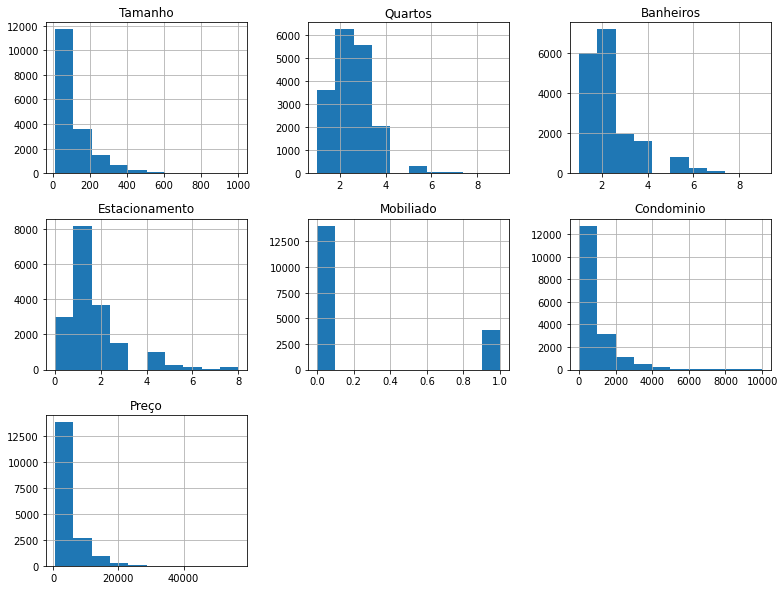

In [ ]:
#Histograma das variáveis
base_total.hist(figsize=(13, 10))
plt.show()

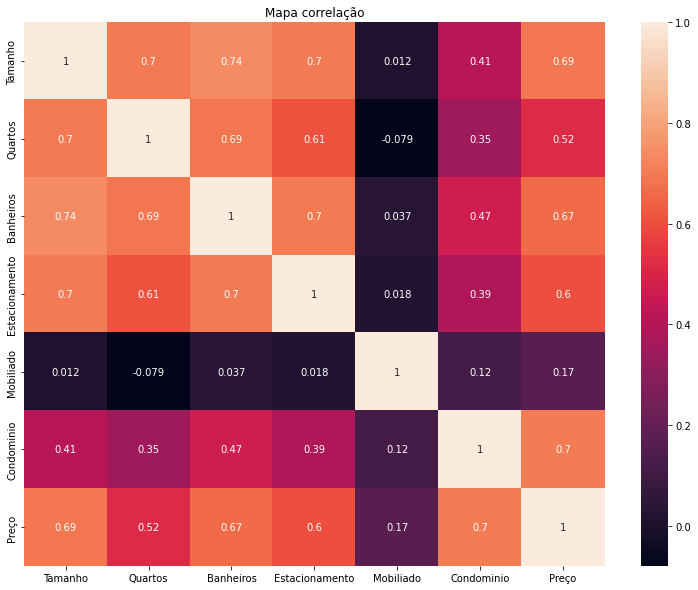

In [ ]:
#Correlação entre as variáveis
plt.figure(figsize=(13,10))
sns.heatmap(base_total.corr(),annot=True)
plt.title("Mapa correlação")
plt.show()

In [ ]:
#Visualização dos dados
grafico = px.scatter_matrix(base_total, dimensions=['Tamanho', 'Condominio', 'Preço'])
grafico.show()

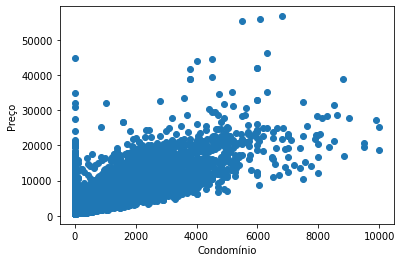

In [ ]:
plt.scatter(base_total['Condominio'], base_total['Preço'])
plt.xlabel("Condomínio")
plt.ylabel("Preço")
plt.show()

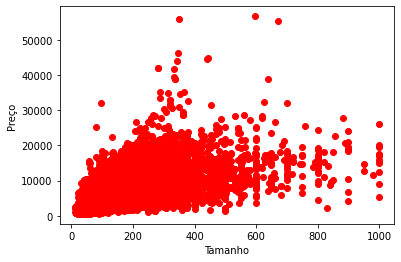

In [ ]:
plt.scatter(base_total['Tamanho'], base_total['Preço'], color = 'r')
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.show()

##Divisão entre previsores e classe

In [ ]:
#Previsores
X_total = base_total.iloc[:, 0:6].values

In [ ]:
X_total 

array([[4.700e+01, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.200e+02],
       [4.500e+01, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.480e+02],
       [4.800e+01, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+02],
       ...,
       [7.000e+01, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 9.800e+02],
       [1.200e+02, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.585e+03],
       [8.000e+01, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
type(X_total)

numpy.ndarray

In [ ]:
#Classe
y_total = base_total.iloc[:,6].values

In [ ]:
y_total

array([ 1150.,  1148.,  1100., ...,  7390., 14020.,  1587.])

In [ ]:
type(y_total)

numpy.ndarray

##Divisão de bases de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_total_treinamento, X_total_teste, y_total_treinamento, y_total_teste = train_test_split(X_total, y_total, test_size = 0.25, random_state = 42) 

In [ ]:
#Tamanho de cada vetor
X_total_treinamento.shape, y_total_treinamento.shape, X_total_teste.shape, y_total_teste.shape

((13413, 6), (13413,), (4471, 6), (4471,))

##Regressão linear multipla

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_total = LinearRegression()
regressor_total.fit(X_total_treinamento, y_total_treinamento)

LinearRegression()

In [ ]:
#score base de treinamento
regressor_total.score(X_total_treinamento, y_total_treinamento)

0.7134716163884018

In [ ]:
#score base de teste
regressor_total.score(X_total_teste, y_total_teste)

0.7302204463692621

In [ ]:
#coeficiente linear
regressor_total.intercept_

-211.69401585531432

In [ ]:
#todos os coeficientes 
regressor_total.coef_

array([  14.29715206, -158.01070189,  515.31174315,  304.31352967,
       1124.15712075,    1.96370603])

In [ ]:
previsoes = regressor_total.predict(X_total_teste)
previsoes

array([13717.57358837,  2468.66837251,  4531.18309341, ...,
        7233.80960105,  1480.69369611,  2189.73925062])

In [ ]:
y_total_teste

array([16500.,  2273.,  3343., ...,  9100.,  1524.,  1340.])

In [ ]:
#importanto a função erro médio absoluto
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_total_teste, previsoes)

1312.585134588452

##SVM

In [ ]:
#Escalonamento de valores
from sklearn.preprocessing import StandardScaler
scaler_x_total = StandardScaler()
X_total_treinamento_scaled = scaler_x_total.fit_transform(X_total_treinamento)
scaler_y_total = StandardScaler()
y_total_treinamento_scaled = scaler_y_total.fit_transform(y_total_treinamento.reshape(-1,1))

In [ ]:
X_total_teste_scaled = scaler_x_total.transform(X_total_teste)
y_total_teste_scaled = scaler_y_total.transform(y_total_teste.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor_svr_total = SVR(kernel='rbf')
regressor_svr_total.fit(X_total_treinamento_scaled, y_total_treinamento_scaled.ravel())

SVR()

In [ ]:
regressor_svr_total.score(X_total_treinamento_scaled, y_total_treinamento_scaled)

0.7457569535400264

In [ ]:
regressor_svr_total.score(X_total_teste_scaled, y_total_teste_scaled)

0.7362144870900216

In [ ]:
previsoes = regressor_svr_total.predict(X_total_teste_scaled)
previsoes

array([ 2.15801022, -0.56645603, -0.17473067, ...,  0.3567765 ,
       -0.69687075, -0.6811079 ])

In [ ]:
y_total_teste_inverse = scaler_y_total.inverse_transform(y_total_teste_scaled)
previsoes_inverse = scaler_y_total.inverse_transform(previsoes.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_total_teste_inverse, previsoes_inverse)

1217.4800673176294

##Redes neurais

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# 16 -> 9 -> 9 -> 1
regressor_rna_total = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_total.fit(X_total_treinamento_scaled, y_total_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [ ]:
regressor_rna_total.score(X_total_treinamento_scaled, y_total_treinamento_scaled)

0.7334788886969674

In [ ]:
regressor_rna_total.score(X_total_teste_scaled, y_total_teste_scaled)

0.7393057644661953

In [ ]:
previsoes = regressor_rna_total.predict(X_total_teste_scaled)
previsoes

array([ 2.24831123, -0.5428794 , -0.08220304, ...,  0.65488115,
       -0.69694027, -0.70374953])

In [ ]:
y_total_teste_inverse = scaler_y_total.inverse_transform(y_total_teste_scaled)
previsoes_inverse = scaler_y_total.inverse_transform(previsoes.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_total_teste_inverse, previsoes_inverse)

1239.3612957283187

##RGB

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
regressorgb =  GradientBoostingRegressor()
regressorgb.fit(X_total_treinamento,y_total_treinamento)

GradientBoostingRegressor()

In [ ]:
regressorgb.score(X_total_treinamento, y_total_treinamento)

0.765832107136672

In [ ]:
regressorgb.score(X_total_teste, y_total_teste)

0.7435111888737773

In [ ]:
previsoes = regressorgb.predict(X_total_teste)
previsoes

array([14590.92099162,  2139.33216121,  5138.13012304, ...,
        6939.08961801,  1392.59486876,  1703.28392381])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_total_teste, previsoes)

1255.6514045988586

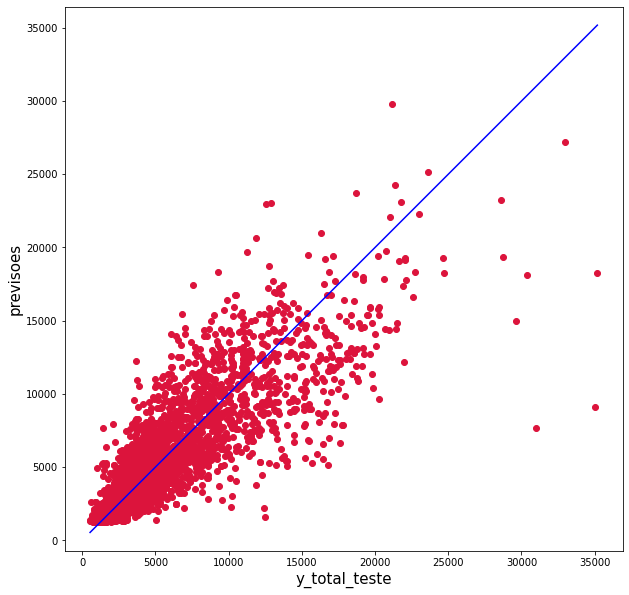

In [ ]:
#plotando o valor das previsoes e y_total
plt.figure(figsize=(10,10))
plt.scatter(y_total_teste, previsoes, c='crimson')
p1 = max(max(previsoes), max(y_total_teste))
p2 = min(min(previsoes), min(y_total_teste))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_total_teste', fontsize=15)
plt.ylabel('previsoes', fontsize=15)
plt.axis('equal')
plt.show()


In [ ]:
len(previsoes)

4471

In [ ]:
count = np.arange(1,4472)

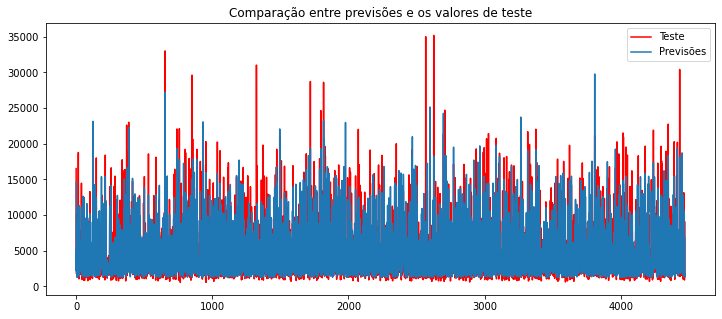

In [126]:
plt.figure(figsize=(12,5))
plt.plot(count, y_total_teste, color ="red")
plt.plot(count, previsoes)
plt.title("Comparação entre previsões e os valores de teste")
plt.gca().legend(('Teste','Previsões'))

plt.show()

## Cross validation

In [ ]:
def ApplyesKFold(x, y):
  # Modelos utilizados.
  from sklearn.linear_model import LinearRegression
  from sklearn.svm import SVR
  from sklearn.neural_network import MLPRegressor
  from sklearn.ensemble import GradientBoostingRegressor

  # Cross-Validation Modelos.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # KFold parâmetros.
  kfold  = KFold(n_splits=15, shuffle=True) #n_splits = (subdivisões) shuffle=True, Shuffle (aleatoriedade dos dados).

  # Eixos
  X_total = x
  y_total = y
  
  #Escalonamento de valores
  from sklearn.preprocessing import StandardScaler
  scaler_X_total = StandardScaler()
  X_total_scaled = scaler_X_total.fit_transform(X_total)
  scaler_y_total = StandardScaler()
  y_total_scaled = scaler_y_total.fit_transform(y_total.reshape(-1,1))



  # Instancia dos modelos.
  regressor_total1 = LinearRegression()
  regressor_svr_total1 = SVR(kernel='rbf')
  regressor_rna_total1 = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
  regressorgb_total1 =  GradientBoostingRegressor()


  # Aplicando K-fold nos modelos.
  linearRegression_result = cross_val_score(regressor_total1, X_total, y_total, cv = kfold)
  svr_result = cross_val_score(regressor_svr_total1, X_total_scaled, y_total_scaled.ravel(), cv = kfold)
  rna_result = cross_val_score(regressor_rna_total1, X_total_scaled, y_total_scaled.ravel(), cv = kfold)
  regressorgb_result = cross_val_score(regressorgb_total1, X_total, y_total, cv = kfold)


  # Criando dicionário para guardar as médias.
  dic_models = {
    "LinearRegression": linearRegression_result.mean(),
    "svr": svr_result.mean(),
    "rna": rna_result.mean(),
    "rgb": regressorgb_result.mean()
  }
  # Selecionando o melhor modelo.
  bestModel = max(dic_models, key=dic_models.get)

  print("Linear Regression Média (R^2): {0}\nsvr Média (R^2): {1}\nrna Média (R^2): {2}\nrgb Média (R^2): {3}"
  .format(linearRegression_result.mean(), svr_result.mean(), rna_result.mean(),regressorgb_result.mean()))
  print("O melhor modelo é: {0} com valor: {1}".format(bestModel, dic_models[bestModel]))



In [ ]:
ApplyesKFold(X_total, y_total)

Linear Regression Média (R^2): 0.7175239881873143
svr Média (R^2): 0.7229250580866555
rna Média (R^2): 0.7295303117063985
rgb Média (R^2): 0.7303399355778819
O melhor modelo é: rgb com valor: 0.7303399355778819
